<a href="https://colab.research.google.com/github/Sreeja0522/Data-Analytics-Project---Pollution-Dataset/blob/main/Execution%26Accuracy.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Data Modeling

In [7]:
#Importing packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

#For displaying all of the columns
pd.set_option('display.max_columns',None)

# For data modeling
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier

In [5]:
# Load dataset into a dataframe
df = pd.read_csv("pollution_dataset.csv")

In [4]:
df.describe()

,Temperature,Humidity,PM2.5,PM10,NO2,SO2,CO,Proximity_to_Industrial_Areas,Population_Density
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000
mean,30.029020,70.056120,20.142140,30.218360,26.412100,10.014820,1.500354,8.425400,497.423800
std,6.720661,15.863577,24.554546,27.349199,8.895356,6.750303,0.546027,3.610944,152.754084
min,13.400000,36.000000,0.000000,-0.200000,7.400000,-6.200000,0.650000,2.500000,188.000000
25%,25.100000,58.300000,4.600000,12.300000,20.100000,5.100000,1.030000,5.400000,381.000000
50%,29.000000,69.800000,12.000000,21.700000,25.300000,8.000000,1.410000,7.900000,494.000000
75%,34.000000,80.300000,26.100000,38.100000,31.900000,13.725000,1.840000,11.100000,600.000000
max,58.600000,128.100000,295.000000,315.800000,64.900000,44.900000,3.720000,25.800000,957.000000


In [8]:
X = df.drop(columns=['Air Quality'])
y = df['Air Quality']

from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)
X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size=0.2, random_state=42)

In [9]:
models = {
    "Logistic Regression": LogisticRegression(solver='saga', max_iter=1000),
    "Random Forest": RandomForestClassifier(n_estimators=100, random_state=42),
    "Support Vector Machine": SVC(),
    "XGBoost": XGBClassifier(use_label_encoder=False, eval_metric='mlogloss')
}

results = {}

In [12]:
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    results[name] = acc
    print(f" {name} - Accuracy: {acc:.4f}")
    print(classification_report(y_test, y_pred))

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


 Logistic Regression - Accuracy: 0.8280
              precision    recall  f1-score   support

           0       0.97      1.00      0.98       409
           1       0.70      0.51      0.59       111
           2       0.82      0.85      0.84       294
           3       0.59      0.60      0.59       186

    accuracy                           0.83      1000
   macro avg       0.77      0.74      0.75      1000
weighted avg       0.82      0.83      0.82      1000

 Random Forest - Accuracy: 0.9600
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       409
           1       0.92      0.88      0.90       111
           2       0.97      0.97      0.97       294
           3       0.88      0.90      0.89       186

    accuracy                           0.96      1000
   macro avg       0.94      0.94      0.94      1000
weighted avg       0.96      0.96      0.96      1000

 Support Vector Machine - Accuracy: 0.7580
             

/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [06:10:15] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


 XGBoost - Accuracy: 0.9610
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       409
           1       0.95      0.89      0.92       111
           2       0.97      0.95      0.96       294
           3       0.87      0.93      0.90       186

    accuracy                           0.96      1000
   macro avg       0.95      0.94      0.95      1000
weighted avg       0.96      0.96      0.96      1000



# Execution and Accuracy

<ipython-input-11-3b2a9ae9ff6e>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="Accuracy", y="Model", data=results_df, palette="viridis")


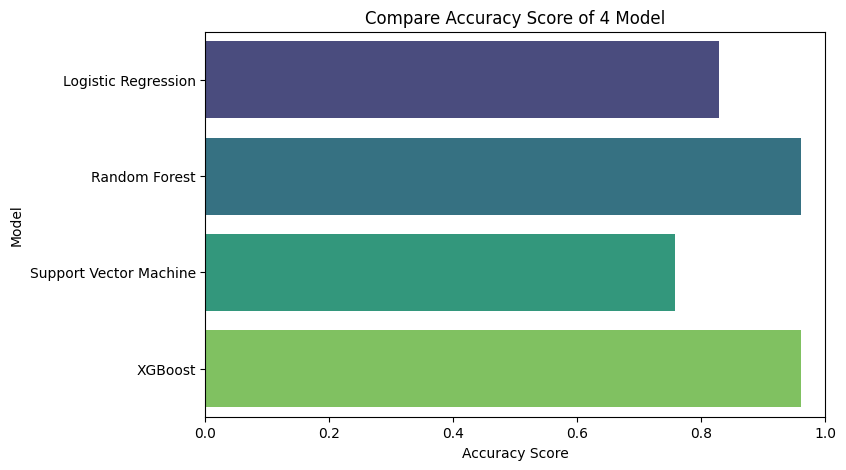

In [11]:
results_df = pd.DataFrame(results.items(), columns=["Model", "Accuracy"])
plt.figure(figsize=(8, 5))
sns.barplot(x="Accuracy", y="Model", data=results_df, palette="viridis")
plt.xlabel("Accuracy Score")
plt.ylabel("Model")
plt.title("Compare Accuracy Score of 4 Model")
plt.xlim(0, 1)
plt.show()